# **Building features leading to reduce earthquake damage**

# **-1- Project Information**

***Team Member***

Kratik Gupta, Mona Ma, Tavishi Pandey, Eunjin Jeong, Zichen Wang,  Yilun Wang 


***Business Problem***

This project aims to analyze the damage to buildings caused by the 2015 Kathmandu, Nepal earthquake with a Richter scale of 7.8; we examine the factors that are associated with reduced damage grade and report them for further earthquake immune construction. Commercially, our project provides the parameters to use in marketing earthquake immune construction in specific earthqauke prone areas. Using our model, we can predict the degree of damage to a building caused by an earthquake event based on building features.

***Project Proposal***

* Visualize the data set on different parameters

* Analyze the insights of data set with different parameters

* Predicting the damage degree of buildings based on parameters

* Find the safest type of building based on parameters


***Dataset***

The dataset is based on the household survey carried out by Nepal government. Nepal govermnemt used mobile technology to assess building damage in the earthquake-affected districts. 

This survey, one of the largest post-disaster datasets ever collected, contains valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics. In addition to reconstruction, this data serves a wide range of uses by researchers, governments, and citizens.

Data sources :


*   Nepal Government  http://eq2015.npc.gov.np/#/
*   Richter's Predictor-Modeling Earthquake Damage  https://www.drivendata.org/competitions/57/nepal-earthquake/page/134/

# **-2- Data Loading and Preprocessing**

In [ ]:
# Package import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso

In [ ]:
eq1=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv')
eq2=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv')
eq= pd.merge(eq1, eq2, how = "inner",on = "building_id")
eq_test=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv')

In [ ]:
#decoding the columns relevant decipher

eq['foundation_type'] = eq['foundation_type'].replace(["r","w","i","u","h"], ["Mud mortar-Stone/Brick","Bamboo/Timber",'RC',"Cement-Stone/Brick","others"]).astype('str')
eq['land_surface_condition'] = eq['land_surface_condition'].replace(["t","o","n"], ["Flat","Steep Slope","Moderate Slope"]).astype('str')
eq['ground_floor_type'] = eq['ground_floor_type'].replace(["f","x","v","z","m"], ["Mud","Brick/Stone","RC","Timber","Others"]).astype('str')
eq['plan_configuration'] = eq['plan_configuration'].replace(["d","u","s","q","m","c","a","n","f","o"], ["Rectangular","L-Shape","T-shape","Square","Multi-projected","H-shape","U-shape","E-shape","Central Courtyard","Others"]).astype('str')
eq['position'] = eq['position'].replace(["t","j","o","s"], ["Attached-1 side","Attached-2 side","Attached-3 side","Not Attached"]).astype('str')
eq['roof_type'] = eq['roof_type'].replace(["n","q","x"], ["Bamboo/Timber-Light roof","Bamboo/Timber-Heavy roof","RCC/RB/RBC"]).astype('str')
eq['other_floor_type'] = eq['other_floor_type'].replace(["q","x","j","s"], ["Time/Bamboo_mud","Timber-Planck","N/A","RCC/RB/RBC"]).astype('str')

# **-3- Basic Information**

##-3.1- About the data

We merged values and labels data to prepare the dataset. We decoded several columns and replaced the name of values.
The dataset has a total of 260,601 rows and 39 columns. The column type is either int64 or object, and we have 22 binary columns.
The dataset doesn't have any null value , and the target variable in this data frame is 'damage_grade.'

In [ ]:
eq.head()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Time/Bamboo_mud,Attached-1 side,Rectangular,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,Steep Slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,Time/Bamboo_mud,Not Attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not Attached,Rectangular,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not Attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
eq.describe()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.238272,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,0.611814,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,2.000000,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,2.000000,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,3.000000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,3.000000,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   damage_grade                            260601 non-null  int64 
 2   geo_level_1_id                          260601 non-null  int64 
 3   geo_level_2_id                          260601 non-null  int64 
 4   geo_level_3_id                          260601 non-null  int64 
 5   count_floors_pre_eq                     260601 non-null  int64 
 6   age                                     260601 non-null  int64 
 7   area_percentage                         260601 non-null  int64 
 8   height_percentage                       260601 non-null  int64 
 9   land_surface_condition                  260601 non-null  object
 10  foundation_type                         260601 non-null 

In [ ]:
#checking null values
eq.isnull().sum().head()

building_id       0
damage_grade      0
geo_level_1_id    0
geo_level_2_id    0
geo_level_3_id    0
dtype: int64

In [ ]:
#checking binary columns
binary = eq.columns[eq.isin([0,1]).all()]
print (binary)
len(binary)

Index(['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')


22

##-3- Target Variable

In [ ]:
eq['damage_grade'].describe()

count    260601.000000
mean          2.238272
std           0.611814
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: damage_grade, dtype: float64

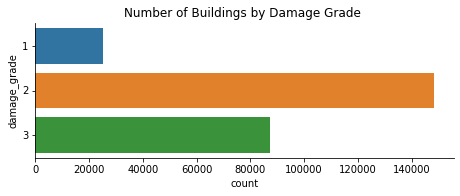

In [ ]:
ax = sns.catplot(y="damage_grade", kind="count", data=eq, height=2.6, aspect=2.5)
plt.title('Number of Buildings by Damage Grade ');

1- Minimal Damage / No damage<br>
2- Moderately Damage <br>
3- Complete Destruction

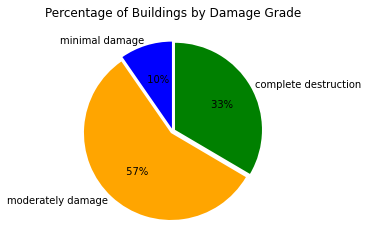

In [ ]:
num1=eq['damage_grade'].loc[eq['damage_grade']==1].count()
num2=eq['damage_grade'].loc[eq['damage_grade']==2].count()
num3=eq['damage_grade'].loc[eq['damage_grade']==3].count()
sum=num1+num2+num3
rat1,rat2,rat3=num1/sum,num2/sum,num3/sum
size=[rat1,rat2,rat3]
labels=['minimal damage','moderately damage','complete destruction']
colors=['blue','orange','green']
explode=(0.03,0.03,0.03)

ass=plt.pie(size,explode=explode,labels=labels,colors=colors,labeldistance=1.06, autopct='%3.0f%%', shadow=False,
startangle=90, pctdistance=0.6)
plt.title('Percentage of Buildings by Damage Grade');




This shows that 

# **-4- Exploratory Data Analysis**

##-4.1- Correlation Matrix

In [ ]:
eq_corr = pd.get_dummies(eq, columns=['legal_ownership_status','land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration'],drop_first=True)

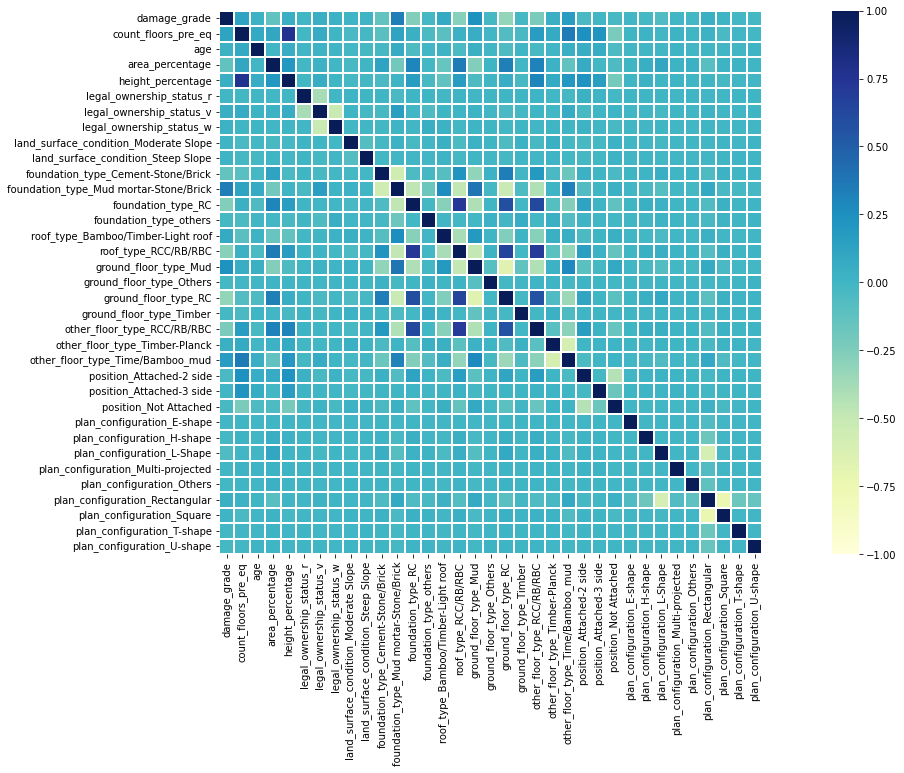

In [ ]:
# Check correlation of all the columns to see if something stands-out explicitly
eq_heat = eq_corr.drop(['building_id','geo_level_1_id','geo_level_2_id','geo_level_3_id','has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other','count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other'],axis=1)
corr= eq_heat.corr()
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(corr,  vmin=-1, vmax=1,ax=ax,
     linewidths=1, xticklabels=corr.columns, yticklabels=corr.columns, cmap='YlGnBu', square=True);

**Initial exploration of the data involved charting most variables on a heat map to get an overview of their relationship with damage grade. The chart deliberately includes a negative scale in order to isolate variables that are correlated with lower damage grades, and thus could potentially be effective in preventing damage to buildings in earth quake zones. From this analysis we identified a few key variables, including age, foundation type, and roof type amongst others, to focus on as we investigated the data further.**

##-4.2- Analyzing Distributions Based on Count Plots

### **Count of Building Age**

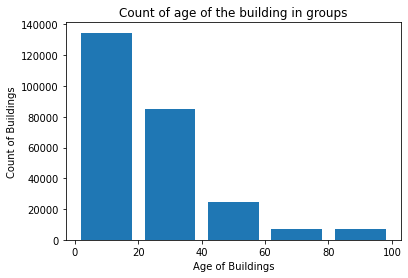

In [ ]:
bins = [0,20,40,60,80,100]
plt.hist('age', data = eq, bins = bins, rwidth =0.8)
plt.xlabel('Age of Buildings')
plt.ylabel("Count of Buildings")
plt.title('Count of age of the building in groups');

**From the graph above, we can see that over 130,000 of the buildings are less than 20 years old, and 40,000 buildings are over 40 years old, only take about one-third of the dataset. **

### **Count of foundation type**

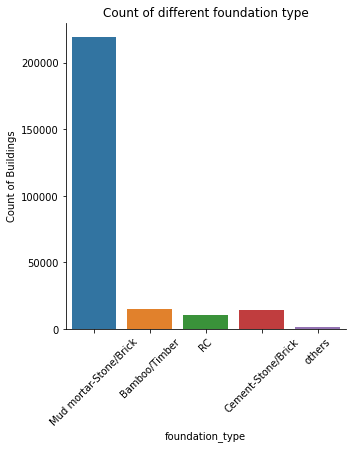

In [ ]:
sns.catplot(x= 'foundation_type', data = eq, kind= "count")
plt.title('Count of different foundation type')
plt.xticks(rotation=45)
plt.ylabel("Count of Buildings");

**Out of ~260,000 buildings in data set, almost 220,000 of the buildings have Mud Mortar-stone with brick as the foundation type, which is around 85% of the datasets, rest of 15% of the building distributed equally into rest three different varieties. **

### **Count of number of floors**

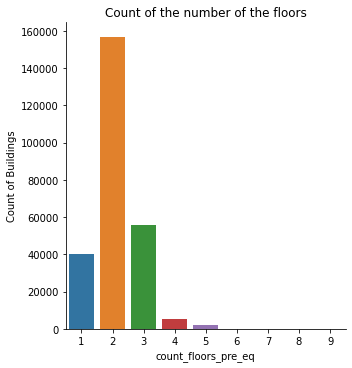

In [ ]:
sns.catplot(x = 'count_floors_pre_eq', data = eq, kind= "count")
plt.title('Count of the number of the floors')
plt.ylabel("Count of Buildings")
plt.show()

**About 160,000 of the buildings are 2-floor buildings, and the rest are either 3-floors buildings or one floor. Less than 10,000 buildings are over four floors, which is only a tiny portion of the dataset.**

### **Count of roof type**

In [ ]:
sns.catplot(x = 'roof_type', data = eq, kind= "count")
plt.xticks(rotation= 45)
plt.title('Count of roof types')
plt.ylabel("Count of Buildings")
plt.show()

**About 180,000 buildings have light rooftops made of Bamboo or Timber; About 60,000 have Heavy rooftops containing 20% of the dataset. Only a small amount of buildings has other different types roof which only has less than 20,000 data.**

### **Count for ground floor types**

In [ ]:
# Count plot : ground_floor_type
sns.catplot(x = 'ground_floor_type', data = eq, kind= "count")
plt.xticks(rotation= 45)
plt.title('Count of ground_floor_type')
plt.ylabel("Count of Buildings")
plt.show()

**There are over 200,000 buildings using mud for the ground floor. Brick/stone and RC types have about 25,000 data for each. Timber and other types only have a tiny amount.**

### **Count of Postion**

In [ ]:
# Count of postion 
sns.countplot(x = 'position', data=eq)
plt.title('Count of the postion')
plt.ylabel("Count of Buildings");

**More than 200,000 of the building were not attached to any sides, which is about 80% of the dataset. Only have a tiny portion of the buildings attached to three sides.**

### **Count of plan configuration**

In [ ]:
sns.countplot(x = 'plan_configuration', data = eq)
plt.title('Count of the plan_configuration')
plt.xticks(rotation = 45)
plt.ylabel("Count of Buildings");

**About 250,000 of the data have a rectangular shape as plan configurations, over 95% of the dataset. The data is highly imbalanced; therefore, might not be the best feature to focus on.**

# **-5-Questions on the Data**

##-5.1- Do old buildings get more damage?

In [ ]:
#Table of average damage by age
eq[eq.age<100].groupby('age')['damage_grade'].mean().to_frame().transpose()

age,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
damage_grade,1.957529,2.103481,2.200689,2.263455,2.30051,2.329599,2.349678,2.351074,2.369827,2.354277,2.38046,2.358091,2.37237,2.352627,2.365063,2.349609,2.405892,2.33294,2.348387,2.357488


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


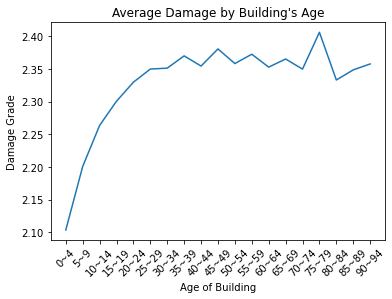

In [ ]:
label_range=range(0,100,5)
label_name=[('{}~{}'.format(label_range[i],label_range[i+1]-1)) for i in range(19)]
eq['age_type']=pd.cut(eq['age'],bins=label_range,labels=label_name)
g2_data=eq.groupby('age_type')['damage_grade'].agg('mean')
plt.plot(g2_data)
plt.xticks(rotation=45)
plt.xlabel("Age of Building")
plt.ylabel("Damage Grade")
plt.title("Average Damage by Building's Age")
plt.show();

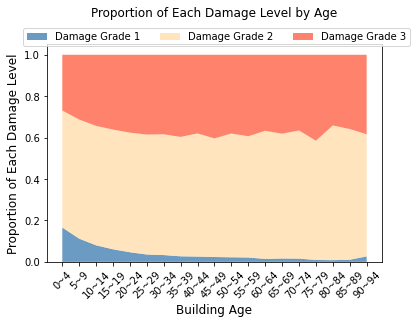

In [ ]:
g2_data2=eq.groupby(['age_type','damage_grade'])['building_id'].agg('count')
g2_data2=pd.DataFrame(g2_data2)
g2_data2['Count']=g2_data2['building_id']
g2_data2=g2_data2.pivot_table(values='Count',columns='damage_grade',index=['age_type'])
g2_data2=g2_data2.reset_index()

g2_data2['total']=g2_data2[1.0]+g2_data2[2.0]+g2_data2[3.0]
g2_data2[1.0]=g2_data2[1.0]/g2_data2['total']
g2_data2[2.0]=g2_data2[2.0]/g2_data2['total']
g2_data2[3.0]=g2_data2[3.0]/g2_data2['total']

plt.stackplot(g2_data2['age_type'],g2_data2[1.0],g2_data2[2.0],g2_data2[3.0],colors=['steelblue','navajowhite','tomato'],alpha=0.8)
plt.xlabel('Building Age',size=12)
plt.ylabel('Proportion of Each Damage Level',size=12)
plt.title("Proportion of Each Damage Level by Age",y=1.1)
plt.xticks(rotation=45)
plt.legend(['Damage Grade 1','Damage Grade 2','Damage Grade 3'],bbox_to_anchor=(1.1,1.1),ncol=3);

*  For buildings under 40 years old, as the age of building increases, the average damage grade increases.
*   For buildings over 40 years old, the moderate damage fluctuates between 2.3-2.4.
*   Overall, old buildings get more damage, but over some point(40), age does not List item significantly affect damage degree

##-5.2- Which foundation type is prone to earthquake?

In [ ]:
eq.pivot_table(values='damage_grade', index=['foundation_type'], aggfunc=["count", "mean"])

,count,mean
,damage_grade,damage_grade
foundation_type,,
Bamboo/Timber,15118,1.810954
Cement-Stone/Brick,14260,1.883661
Mud mortar-Stone/Brick,219196,2.329573
RC,10579,1.453351
others,1448,2.105663


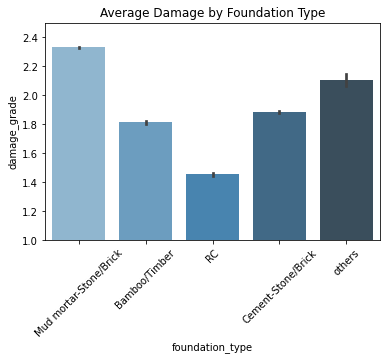

In [ ]:
from numpy import mean
ax = sns.barplot(x='foundation_type', y='damage_grade', data=eq, estimator=mean, palette="Blues_d")
plt.xticks(rotation=45)
plt.ylim(1.0, 2.5)
plt.title("Average Damage by Foundation Type")
plt.xlabel("Foundation Type")
plt.ylabel("Damage Grade");

* The buildings with mud and brick foundation account for more than 80% of the total.
* On average, The buildings with mud and brick foundation are damaged the most.
* RC(reinforced concrete) buildings get damaged the least.

##-5.3- Which land surface condition is associated with less damage?

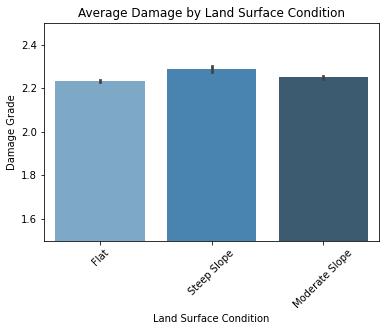

In [ ]:
ax = sns.barplot(x='land_surface_condition', y='damage_grade', data=eq, estimator=mean, palette="Blues_d")
plt.xticks(rotation=45)
plt.ylim(1.5, 2.5)
plt.title("Average Damage by Land Surface Condition")
plt.xlabel("Land Surface Condition")
plt.ylabel("Damage Grade");

* Buildings built on the flat surface get the lowest damage.
* Buildings built on the steelp slope get damaged the most.
* However, there isn't a clear difference between land surface conditions.

##-5.4- Do higher buildings get more damage?

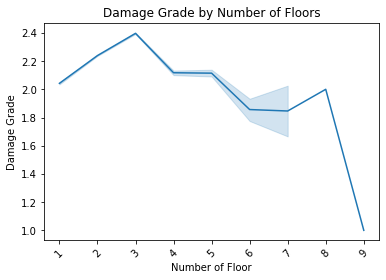

In [ ]:
ax = sns.lineplot(x='count_floors_pre_eq', y='damage_grade', data=eq, palette="Blues_d")
plt.xticks(rotation=45)
plt.xlabel("Number of Floor")
plt.ylabel("Damage Grade")
plt.title("Damage Grade by Number of Floors");



*   The damage grade increases on average, as the number of floor increases until third floor.
*   The damage grade tends to decrease over fourth floor. However, this result might not represent relationship well since only a small portion of buildings is over 4 floors. 



##-5.5- Does damage grade change with height percentage?

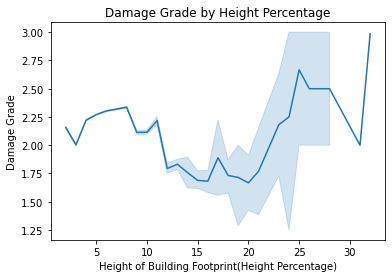

In [ ]:
ax = sns.lineplot(x='height_percentage', y='damage_grade', data=eq,  palette="Blues_d")
plt.xlabel("Height of Building Footprint(Height Percentage)")
plt.ylabel("Damage Grade")
plt.title("Damage Grade by Height Percentage");

* Below 20%, the damage grade has tendency to decrease.
* After 20%, the damage grade starts to increase.
* Maybe buildings can be vulnerable to earthquake if the height percentage is too high.

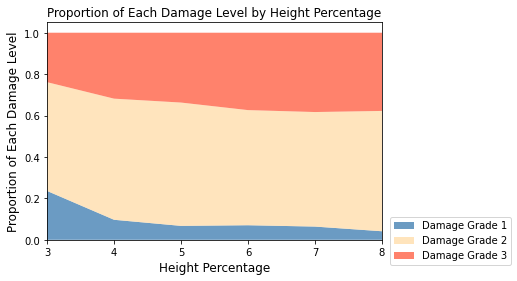

In [ ]:
g2_data2=eq.groupby(['height_percentage','damage_grade'])['building_id'].agg('count')
g2_data2=pd.DataFrame(g2_data2)
g2_data2['Count']=g2_data2['building_id']
g2_data2=g2_data2.pivot_table(values='Count',columns='damage_grade',index=['height_percentage'])
g2_data2=g2_data2.reset_index()

g2_data2['total']=g2_data2[1.0]+g2_data2[2.0]+g2_data2[3.0]
g2_data2[1.0]=g2_data2[1.0]/g2_data2['total']
g2_data2[2.0]=g2_data2[2.0]/g2_data2['total']
g2_data2[3.0]=g2_data2[3.0]/g2_data2['total']

plt.stackplot(g2_data2['height_percentage'],g2_data2[1.0],g2_data2[2.0],g2_data2[3.0],colors=['steelblue','navajowhite','tomato'],alpha=0.8)
plt.xlim(3,8)
plt.xlabel('Height Percentage',size=12)
plt.ylabel('Proportion of Each Damage Level',size=12)
plt.title("Proportion of Each Damage Level by Height Percentage")
plt.legend(['Damage Grade 1','Damage Grade 2','Damage Grade 3'],bbox_to_anchor=(1.4,0.13),ncol=1);

In [ ]:
eq_age = eq[eq.age < 500]
#fig, ax = plt.subplots(figsize=(1,10))
sns.catplot(data=eq_age, y='age', x='count_floors_pre_eq', kind= 'strip',hue='damage_grade',aspect=15.7/10.27)
plt.xlabel('Count of Floors Pre Earthquake')
plt.ylabel('Age')
plt.title('Relation Between Age and Count of Floors');

 

*   Generally buildings over 20 years of age are more prone to damage than younger buildings damage than younger buildings.
*   However, a partern has been seen in the buildings with floor level 3 and 4 suffer more damage, irrespective of age of building they show the same trend of damage.


##-5.6- Features which are more prone to Earthquake

Using Lasso regression to find the important features

In [ ]:
eq1=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv')
eq2=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv')
eq= pd.merge(eq1, eq2, how = "inner",on = "building_id")
eq.drop(['building_id','geo_level_1_id','geo_level_2_id',
              'geo_level_3_id','land_surface_condition',
              'foundation_type','roof_type','ground_floor_type',
              'other_floor_type','position','plan_configuration',
              'legal_ownership_status'],axis=1)
eq=eq.dropna(axis=0)
eq_ml=eq
y=eq_ml['damage_grade']
x=eq_ml[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
      'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
        'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other'
       ]]
coef=[]
for a in np.arange(0,0.0005,0.00005):
  lasso=Lasso(alpha=a,normalize=True)
  lasso_reg=lasso.fit(x,y)
  coef.append(lasso_reg.coef_)
coef=pd.DataFrame(coef)
coef.columns=['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
      'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
        'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']
importance_level=dict()
for i in coef.columns:
  importance_level[i]=sum(coef[i]!=0)
  variable=list(importance_level.keys())
importance=list(importance_level[i] for i in variable)
importance_chart=pd.DataFrame({'Variables':variable,'Importance':importance},index=range(0,27))
importance_chart=importance_chart.sort_values('Importance',ascending=False).reset_index(drop=True,inplace=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40642.457588618134, tolerance: 9.754671972095046
  positive)


In [ ]:
importance_chart.head(6)

,Variables,Importance
0,has_superstructure_mud_mortar_stone,7
1,has_superstructure_cement_mortar_brick,6
2,has_superstructure_rc_engineered,4
3,has_superstructure_rc_non_engineered,3
4,count_floors_pre_eq,3
5,has_superstructure_adobe_mud,3


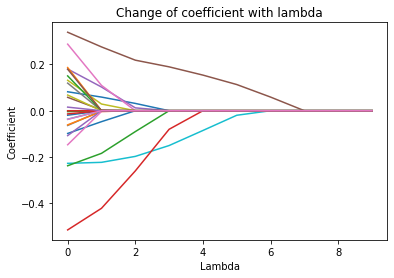

In [ ]:
plt.plot(coef)
plt.title('Change of coefficient with lambda')
plt.xlabel('Lambda')
plt.ylabel('Coefficient');

The plot is just showing the trend of the coefficient when lambda increasing.



The importance level here refers to the number of times that the coefficient of this variable is not zero when increasing lambda. If the value is higher, we can say that it is a better variable to predict the damage grade.

The regression shows that:
*   has_superstructure_mud_mortar_stone
*   has_superstructure_cement_mortar_brick#
*   has_superstructure_rc_engineered#
*   count_floors_pre_eq
*   has_superstructure_adobe_mud
*   has_superstructure_rc_non_engineered#

are the most important factors.









# **Additional question part: Combination of features, what can be done with them**

## Why age is considered not important in lasso

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


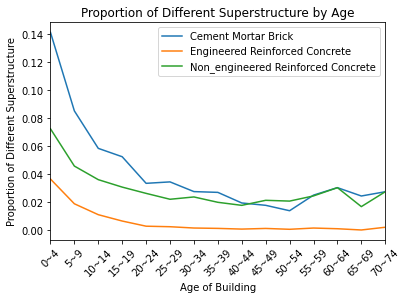

In [ ]:
eq1=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv')
eq2=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv')
eq= pd.merge(eq1, eq2, how = "inner",on = "building_id")
eq_test=pd.read_csv('https://raw.githubusercontent.com/kratik28/780_project/main/Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv')
label_range=range(0,100,5)
label_name=[('{}~{}'.format(label_range[i],label_range[i+1]-1)) for i in range(19)]
eq['age_type']=pd.cut(eq['age'],bins=label_range,labels=label_name)
g_data1=eq.groupby('age_type')['has_superstructure_cement_mortar_brick'].agg('mean')
g_data2=eq.groupby('age_type')['has_superstructure_rc_engineered'].agg('mean')
g_data3=eq.groupby('age_type')['has_superstructure_rc_non_engineered'].agg('mean')

p1=plt.plot(g_data1)
p2=plt.plot(g_data2)
p3=plt.plot(g_data3)

plt.xticks(rotation=45)
plt.xlabel("Age of Building")
plt.ylabel("Proportion of Different Superstructure")
plt.legend(['Cement Mortar Brick','Engineered Reinforced Concrete','Non_engineered Reinforced Concrete'])
plt.title("Proportion of Different Superstructure by Age")
plt.xlim(0,14)
plt.show();

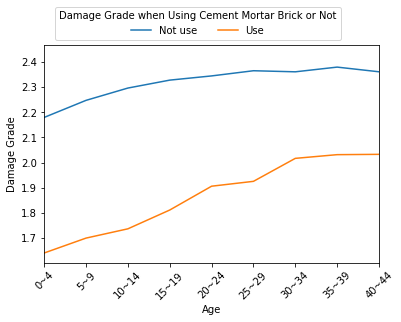

In [ ]:
from bokeh.layouts import column
g_data6=eq.groupby(['has_superstructure_cement_mortar_brick','age_type'])['damage_grade'].agg('mean')
g_data6=pd.DataFrame(g_data6).reset_index()
p1=sns.lineplot(x='age_type',y='damage_grade',hue='has_superstructure_cement_mortar_brick',data=g_data6)


plt.legend(['Not use','Use'],title='Damage Grade when Using Cement Mortar Brick or Not',bbox_to_anchor=(0.9,1.2),ncol=3);
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Damage Grade')
plt.xlim(0,8);

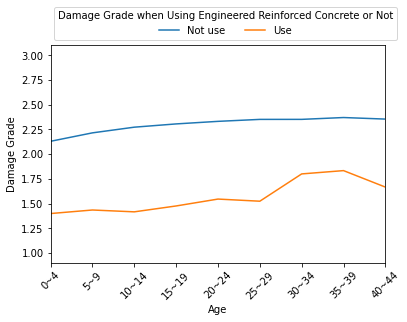

In [ ]:
g_data6=eq.groupby(['has_superstructure_rc_engineered','age_type'])['damage_grade'].agg('mean')
g_data6=pd.DataFrame(g_data6).reset_index()
p2=sns.lineplot(x='age_type',y='damage_grade',hue='has_superstructure_rc_engineered',data=g_data6)
plt.legend(['Not use','Use'],title='Damage Grade when Using Engineered Reinforced Concrete or Not',bbox_to_anchor=(1.05,1.2),ncol=3);
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Damage Grade')
plt.xlim(0,8);


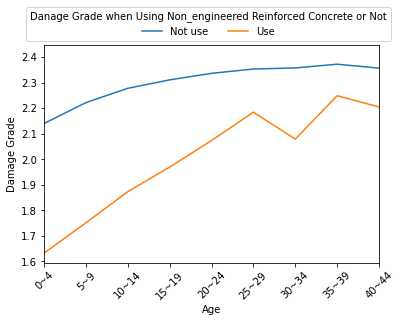

In [ ]:
g_data6=eq.groupby(['has_superstructure_rc_non_engineered','age_type'])['damage_grade'].agg('mean')
g_data6=pd.DataFrame(g_data6).reset_index()
p3=sns.lineplot(x='age_type',y='damage_grade',hue='has_superstructure_rc_non_engineered',data=g_data6)
plt.legend(['Not use','Use'],title='Danage Grade when Using Non_engineered Reinforced Concrete or Not',bbox_to_anchor=(1.05,1.2),ncol=3);
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Damage Grade')
plt.xlim(0,8);

When we control the type of superstructure, especially when we control the use of engineered reinforced concrete, building age shows much less effect on damage grade.
The correlationship between building age and the superstructure type contributed a lot to the correlation between buidling age and damage grade.

# **-6- Conclusion**

### **Findings:**

**Age:**
*   For buildings younger than 40, the older, the easier to be damaged; however, when older than 40, increase of age do not really affect the damage level
*   Based on the lasso regression, age doesn't affect the damage level substantially. The result of visualization could be because of the collinearity between house structure and building age

**Foundation:**
*   Buildings with Mud mortar-Stone or Brick foundation have the highest damage level 
*   Buildings with reinforced concrete fundation appear to have least damage
*   Interestingly, buildings in Kathmandu, Nepal are mostly built with mud and brick foundation, which can be extremely dangerous due to its location of high possibility of earthquake

**Landsurface:**
*   From visualization, buildings built on the flat surface had the lowest damage; buildings built on the steep slope get most damaged
*   Nevertheless, different type of landsurfaces do not change with the damage level substantially enough

**Height & Height Percentage:**
*   Initially, considering the dataset, there is a possibility that buildings with higher height can be more dangerous when exposed to earthquake
*   Although there is a unique U-shaped relationship in the visual results - this is most likely a random result due to the small number of building samples with a height percentage higher than 8% 

**Concetration on parameters in Data Set**


*   After analyzing the data set, it can be observed that the dataset is biased on some parameters such as ground_floor_type, plan_configuration etc., as more than 80% of data for these parameters is for one category and will not be able to provide meaningful predictions for other categories. However, this dataset is a random sample of the population, and same skewness can also be seen the population data. The predictions will be restricted to Nepal region.


**Lasso:**
*   While it might seems intuitive that age of the building should have an influence on damage grade, the Lasso regression deemed age a weaker coefficient than we expected. Upon further analysis of what could have led to this trend, we observed that buildings built in the last ~25 years saw substantally lower damage grades; however, building 25+ years old saw steadier damage grade trends. While investigating the cause of this trend, it was found that buildings built in the last 25 years saw exponential use of cement use in their super structures, which could have contributed to lower damage grades for these types of buildings.


## **-7- Machine Learning (optional)**

In [ ]:
##creating function
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
  
def run_model(X_train,X_test,y_train,y_test,model):
  model.fit(X_train,y_train);
  y_hat = model.predict(X_test)
  tp_1 = ((y_hat == 1) & (y_test == 1)).sum()
  tp_2 = ((y_hat == 2) & (y_test == 2)).sum()
  tp_3 = ((y_hat == 3) & (y_test == 3)).sum()
  tn_1 = (((y_hat == 2) & (y_test == 2))|((y_hat == 3) & (y_test == 3))).sum()
  tn_2 = (((y_hat == 1) & (y_test == 1))|((y_hat == 3) & (y_test == 3))).sum()
  tn_3 = (((y_hat == 2) & (y_test == 2))|((y_hat == 1) & (y_test == 1))).sum()
  #sensitivity
  tpr_1 = tp_1/(y_test==1).sum()
  tpr_2 = tp_2/(y_test==2).sum()
  tpr_3 = tp_3/(y_test==3).sum()
  
  #specificity
  tnr_1 = tn_1/((y_test == 2)|(y_test == 3)).sum()
  tnr_2 = tn_1/((y_test == 1)|(y_test == 3)).sum()
  tnr_3 = tn_1/((y_test == 1)|(y_test == 2)).sum()
  
  #printing result metrics
  print('The Sensitivity for Damage 1 : {}, Damage 2 : {}, Damage 3 : {}'.format(tpr_1,tpr_2,tpr_3))
  print('The Specificity for Damage 1 : {}, Damage 2 : {}, Damage 3 : {}'.format(tnr_1,tnr_2,tnr_3))
  print('The True Positives for Damage 1 : {}, Damage 2 : {}, Damage 3 : {}'.format(tp_1,tp_2,tp_3))
  print('The True Negatives for Damage 1 : {}, Damage 2 : {}, Damage 3 : {}'.format(tn_1,tn_2,tn_3))
  print('Accuracy : {}'.format(accuracy_score(y_test,y_hat)))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
  #print(confusion_matrix(y_test,y_hat))
  #return confusion_matrix(y_test,y_hat)

In [ ]:
df = pd.get_dummies(eq, drop_first=True)

In [ ]:
#decoding the columns relevant decipher

import pandas as pd
import numpy as np

X = df.drop('damage_grade', axis=1)
y = df['damage_grade']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0,max_features='sqrt')
run_model(X_train,X_test,y_train,y_test,regressor)

The Sensitivity for Damage 1 : 0.45727574750830563, Damage 2 : 0.8309792737969596, Damage 3 : 0.5514680549707155
The Specificity for Damage 1 : 0.7276381340579711, Damage 2 : 1.5279362815026154, Damage 3 : 0.9875907641476814
The True Positives for Damage 1 : 3441, Damage 2 : 37006, Damage 3 : 14406
The True Negatives for Damage 1 : 51412, Damage 2 : 17847, Damage 3 : 40447
Accuracy : 0.7016154820224862
Mean Squared Error: 0.31404049577263016


### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_gaussian = GaussianNB(var_smoothing=1e-09)

In [ ]:
run_model(X_train, X_test, y_train, y_test, nb_gaussian)

The Sensitivity for Damage 1 : 0.006112956810631229, Damage 2 : 0.9942065434621516, Damage 3 : 0.0
The Specificity for Damage 1 : 0.6266276041666666, Damage 2 : 1.3158285782215882, Damage 3 : 0.8504936801260133
The True Positives for Damage 1 : 46, Damage 2 : 44275, Damage 3 : 0
The True Negatives for Damage 1 : 44275, Damage 2 : 46, Damage 3 : 44321
Accuracy : 0.5669024443279057
Mean Squared Error: 0.4373185300776403


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
run_model(X_train,X_test,y_train,y_test,dtree)

The Sensitivity for Damage 1 : 0.47375415282392025, Damage 2 : 0.6898479779040262, Damage 3 : 0.6103433755694215
The Specificity for Damage 1 : 0.6604534646739131, Damage 2 : 1.386858059914408, Damage 3 : 0.896404010910907
The True Positives for Damage 1 : 3565, Damage 2 : 30721, Damage 3 : 15944
The True Negatives for Damage 1 : 46665, Damage 2 : 19509, Damage 3 : 34286
Accuracy : 0.6424834678502449
Mean Squared Error: 0.3993041787646615


* Additionaly, we ran three models to predict damage of buidlings : 1)Random Forest, 2)GaussianNB, 3)Decision Tree.
* Random Forest has the highest Accuracy, and the lowest Mean Squared Error

##Solution to business Problem

Based on our data exploratory process, we can conclude that building using RC foundation, RC structure and height of 3-4 levels  has more chance of minimimalizing damage.